# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 7. Решающие деревья и случайные леса.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.




**Баллы за задание:**

* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 50 баллов
* Задача 3 &mdash; 30 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [68]:
# Bot check

# HW_ID: fpmi_ad7
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [70]:
from sklearn import datasets
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
import graphviz

In [71]:
def get_graphviz_graph(decision_tree_regressor, X, y):
    '''
    Функция для обучения решающего дерева и построения
    по нему графа graphviz для визуализации
    '''
    
    decision_tree_regressor.fit(X, y)
    dot_data = export_graphviz(
        decision_tree_regressor, out_file=None, 
        feature_names=X.columns, class_names='Price',  
        filled=True, rounded=True, special_characters=True
    )  
    return graphviz.Source(dot_data) 

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/trees.html">ноутбук</a> с занятия по решающим деревьям.

---
### Задача 1.

Перед обучением линейной регрессии вы могли совершать некоторые преобразования над признаками. Какие преобразования стоит совершить перед обучением решающего дерева?

В частности, ответьте на вопрос, имеет ли смысл примененять следующие преобразования:
* монотонные функции от одного признака;
* немонотонные функции от одного признака;
* линейные функции от нескольких признаков;
* нелинейные функции от нескольких признаков;
* стандартизация признаков;
* преобразования категориальных признаков.

Например, вместо/дополнительно признака $x_j$ рассматривать признак $f(x_j)$, для указанных выше типов функций.

**Ответ:** 
* Применять монотонные функции от одного признака не имеет смысла, потому что дереву нет разницы для чего искать разделитель: для исходного признака или для монотонной функции от исходного признака.
* Применять стандартизацию признаков не требуется, так как для дерева не важно "в каком масштабе" разбросаны значения.
* Применять преобразование категориальных признаков также не требуется, дерево хорошо работает и с категориальными признаками
* Необходимость применения немонотонных функций от одного признака, линейных и нелинейных функций от нескольких признаков зависит от поставленной задачи. Так, допустим, при решении задачи регрессии, все данные для которой были искусственно сгенерированы: y = sin(x) лучше будет добавить дополнительный признак, аналогично с другими преобразованиями.

---
### Задача 2.

Рассмотрим данные из <a href="https://miptstats.github.io/courses/ad_fivt/task6.html" target="_blank">предыдущего домашнего задания</a>. Скачайте данные и разделите их на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1.

In [72]:
fields = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 
          'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

df = pd.read_csv('day.csv', usecols=fields)
df = df[df.apply(lambda x: (x - x.mean())/x.std() < 3).all(axis=1)]

In [73]:
train, test = train_test_split(df, test_size=0.2)
train, val = train_test_split(train, test_size=0.25)

Выполните необходимые преобразования признаков.

*Замечание.* Если в валидационной и/или тестовой частях есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики. 

In [74]:
X_train = train.drop(columns=['cnt'])
X_test = test.drop(columns=['cnt'])
X_val = val.drop(columns=['cnt'])


y_train = train['cnt']
y_test = test['cnt']
y_val = val['cnt']

In [75]:
X_train

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
236,3,8,0,4,1,2,0.684167,0.645854,0.771667,0.210833
297,4,10,0,2,1,1,0.471667,0.463375,0.622917,0.166658
287,4,10,0,6,0,1,0.506667,0.498725,0.483333,0.258083
692,4,11,0,5,1,1,0.368333,0.378779,0.568750,0.148021
723,1,12,0,1,1,2,0.231304,0.258900,0.791304,0.077230
...,...,...,...,...,...,...,...,...,...,...
328,4,11,0,5,1,1,0.375000,0.380671,0.643750,0.098896
309,4,11,0,0,0,1,0.348333,0.362358,0.734583,0.092054
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
31,1,2,0,2,1,2,0.192174,0.234530,0.829565,0.053213


Обучите решающее дерево глубины 3 и визуализируйте его. 

*Рекомендуется сохранить визуализацию в html и отправить ее вместе с решением.*

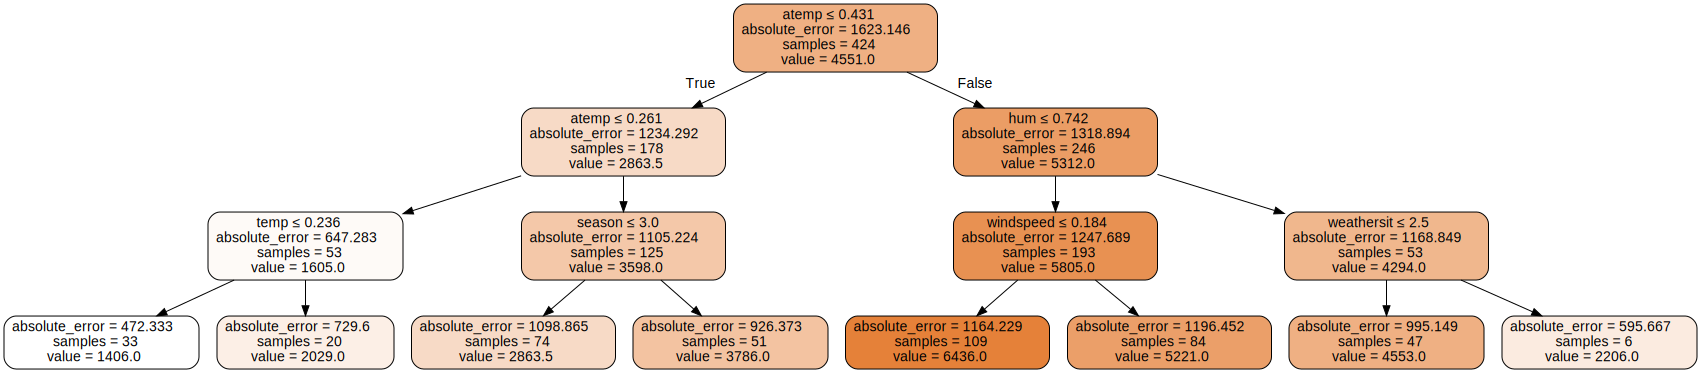

In [76]:
reg = DecisionTreeRegressor(
    criterion='absolute_error', max_depth=3, min_samples_split=10
)
graph = get_graphviz_graph(reg, X_train, y_train)
graph

In [77]:
mean_absolute_percentage_error(y_test, reg.predict(X_test))

0.3098353478180882

Подберите оптимальное значение максимальной глубины дерева. Для этого обучите решающие деревья с выставленным значением соответствующего гиперпараметра и посчитайте ошибку предсказаний каждого из них на валидационной выборке. Постройте соответствующий график.

In [78]:
def plot_mape(mape, xlabel):
    sns.set(style='darkgrid', font_scale=1.3, palette='Set2')
    fig, ax = plt.subplots()
    ax.plot([i[0] for i in mape], [i[1] for i in mape], 'D--', label='MAPE val')
    ax.minorticks_on()
    ax.grid(which='minor',
            color = 'white',
            linewidth = 1)
    plt.xlabel(xlabel)
    plt.ylabel("MAPE")
    plt.title("MAPE")
    plt.legend()
    plt.show()
def plot_rmse(rmse, xlabel):
    sns.set(style='darkgrid', font_scale=1.3, palette='Set2')
    fig, ax = plt.subplots()
    ax.plot([i[0] for i in rmse], [i[1] for i in rmse], 'D--', label='RMSE val')
    ax.minorticks_on()
    ax.grid(which='minor',
            color = 'white',
            linewidth = 1)
    plt.xlabel(xlabel)
    plt.ylabel("RMSE")
    plt.title("RMSE")
    plt.legend()
    plt.show()

In [79]:
mape = []
rmse = []
for i in range(1, 25):
    reg = DecisionTreeRegressor(
        criterion='absolute_error', max_depth=i,
#         min_samples_split=10
    )
    reg.fit(X_train, y_train)
    mape.append((i, 
                 mean_absolute_percentage_error(y_val,reg.predict(X_val))
                ))
    rmse.append((i, 
                 mean_squared_error(y_val,reg.predict(X_val))
                ))

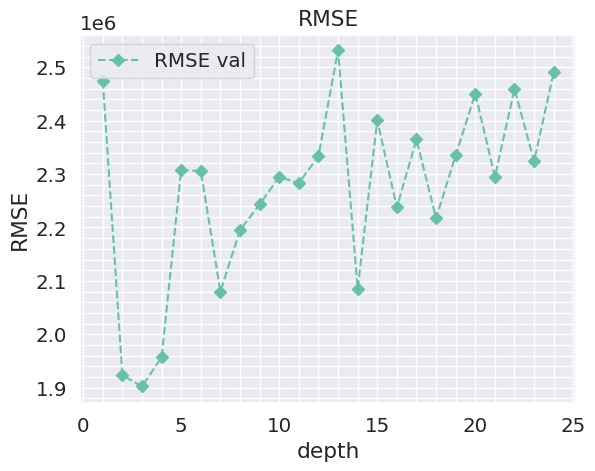

In [80]:
plot_rmse(rmse, xlabel='depth')

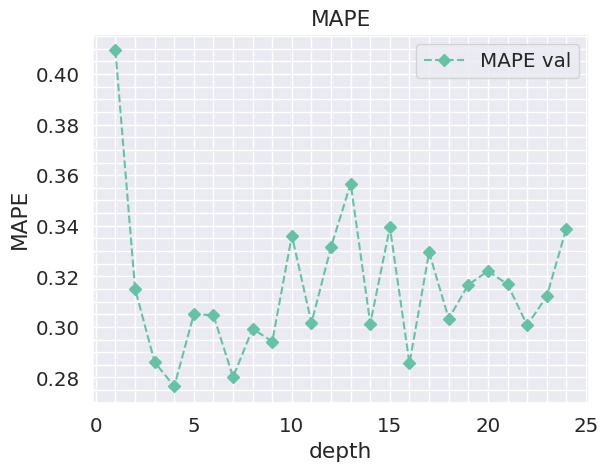

In [81]:
plot_mape(mape, xlabel='depth')

In [82]:
min_maxdepth_mape = sorted(mape, key=lambda x:x[1])[0][0]
min_maxdepth_rmse = sorted(rmse, key=lambda x:x[1])[0][0]

min_maxdepth_mape, min_maxdepth_rmse

(4, 3)

Выберем **max_depth = 3**

Аналогичным образом подберите минимальное число объектов в листе, зафиксировав при этом подобранное значение максимальной глубины.

In [83]:
mape = []
rmse = []
for i in range(1, 25):
    reg = DecisionTreeRegressor(
        criterion='absolute_error', max_depth=3,
        min_samples_leaf=i
    )
    reg.fit(X_train, y_train)
    mape.append((i, 
                 mean_absolute_percentage_error(y_val,reg.predict(X_val))
                ))
    rmse.append((i, 
                 mean_squared_error(y_val,reg.predict(X_val))
                ))

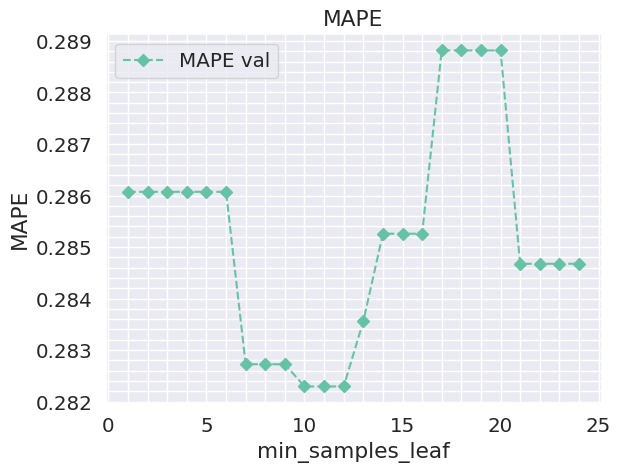

In [84]:
plot_mape(mape, 'min_samples_leaf')

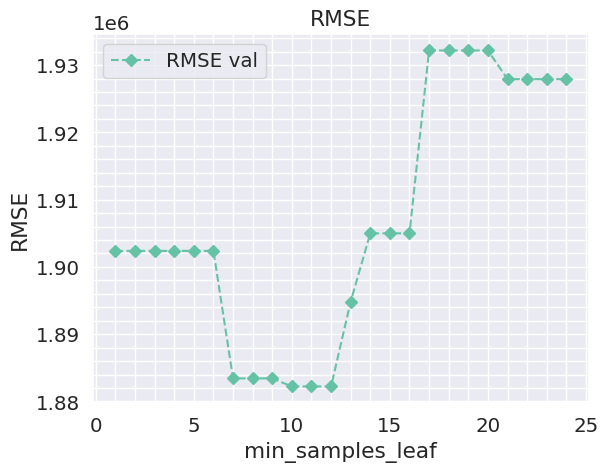

In [85]:
plot_rmse(rmse, 'min_samples_leaf')

Выберем **min_samples_leaf = 10**

Визуализируйте дерево при оптимальных гиперпараметрах и посчитайте его ошибку на тестовой части выборки.

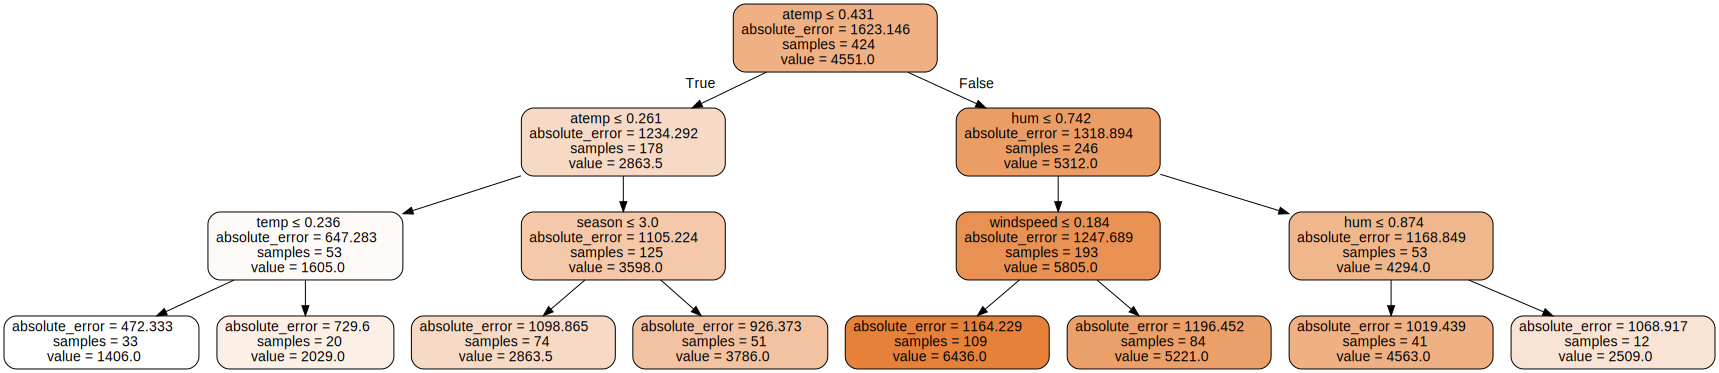

In [106]:
opt_reg_tree = DecisionTreeRegressor(criterion='absolute_error', max_depth=3, min_samples_leaf=10)
opt_graph = get_graphviz_graph(opt_reg_tree, X_train, y_train)
filename = opt_graph.render(filename='opt_tree')
opt_graph

In [91]:
print("MAPE:",round(mean_absolute_percentage_error(y_val, opt_reg_tree.predict(X_val))*100, 2), "%\nRMSE:",
mean_squared_error(y_val, opt_reg_tree.predict(X_val)))

MAPE: 28.23 %
RMSE: 1882227.8485915493


In [88]:
print("MAPE:",round(mean_absolute_percentage_error(y_test, opt_reg_tree.predict(X_test))*100, 2), "%\nRMSE:",
mean_squared_error(y_test, opt_reg_tree.predict(X_test)))

MAPE: 30.86 %
RMSE: 2142493.0035211267


Решающее дерево позволяет оценить *важность признаков* &mdash; некоторая величина, зависящая от того
* насколько часто тот или иной признак использовался при разбиении листа, 
* и насколько сильно при этом изменился критерий информативности.

У обученной модели значения важности признаков лежат в поле `feature_importances_`. Визуализируйте их с помощью `seaborn.barplot`.

In [89]:
feature_importance = pd.DataFrame(np.array(list(zip(X_train.columns, opt_reg_tree.feature_importances_))).reshape(-1, 2))
feature_importance = feature_importance.set_index(0)
feature_importance.columns = ['Values']
feature_importance = feature_importance.explode('Values')
feature_importance['Values'] = feature_importance['Values'].astype('float')
feature_importance

,Values
0,
season,0.038764
mnth,0.000000
holiday,0.000000
weekday,0.000000
workingday,0.000000
weathersit,0.000000
temp,0.016678
atemp,0.773123
hum,0.117278


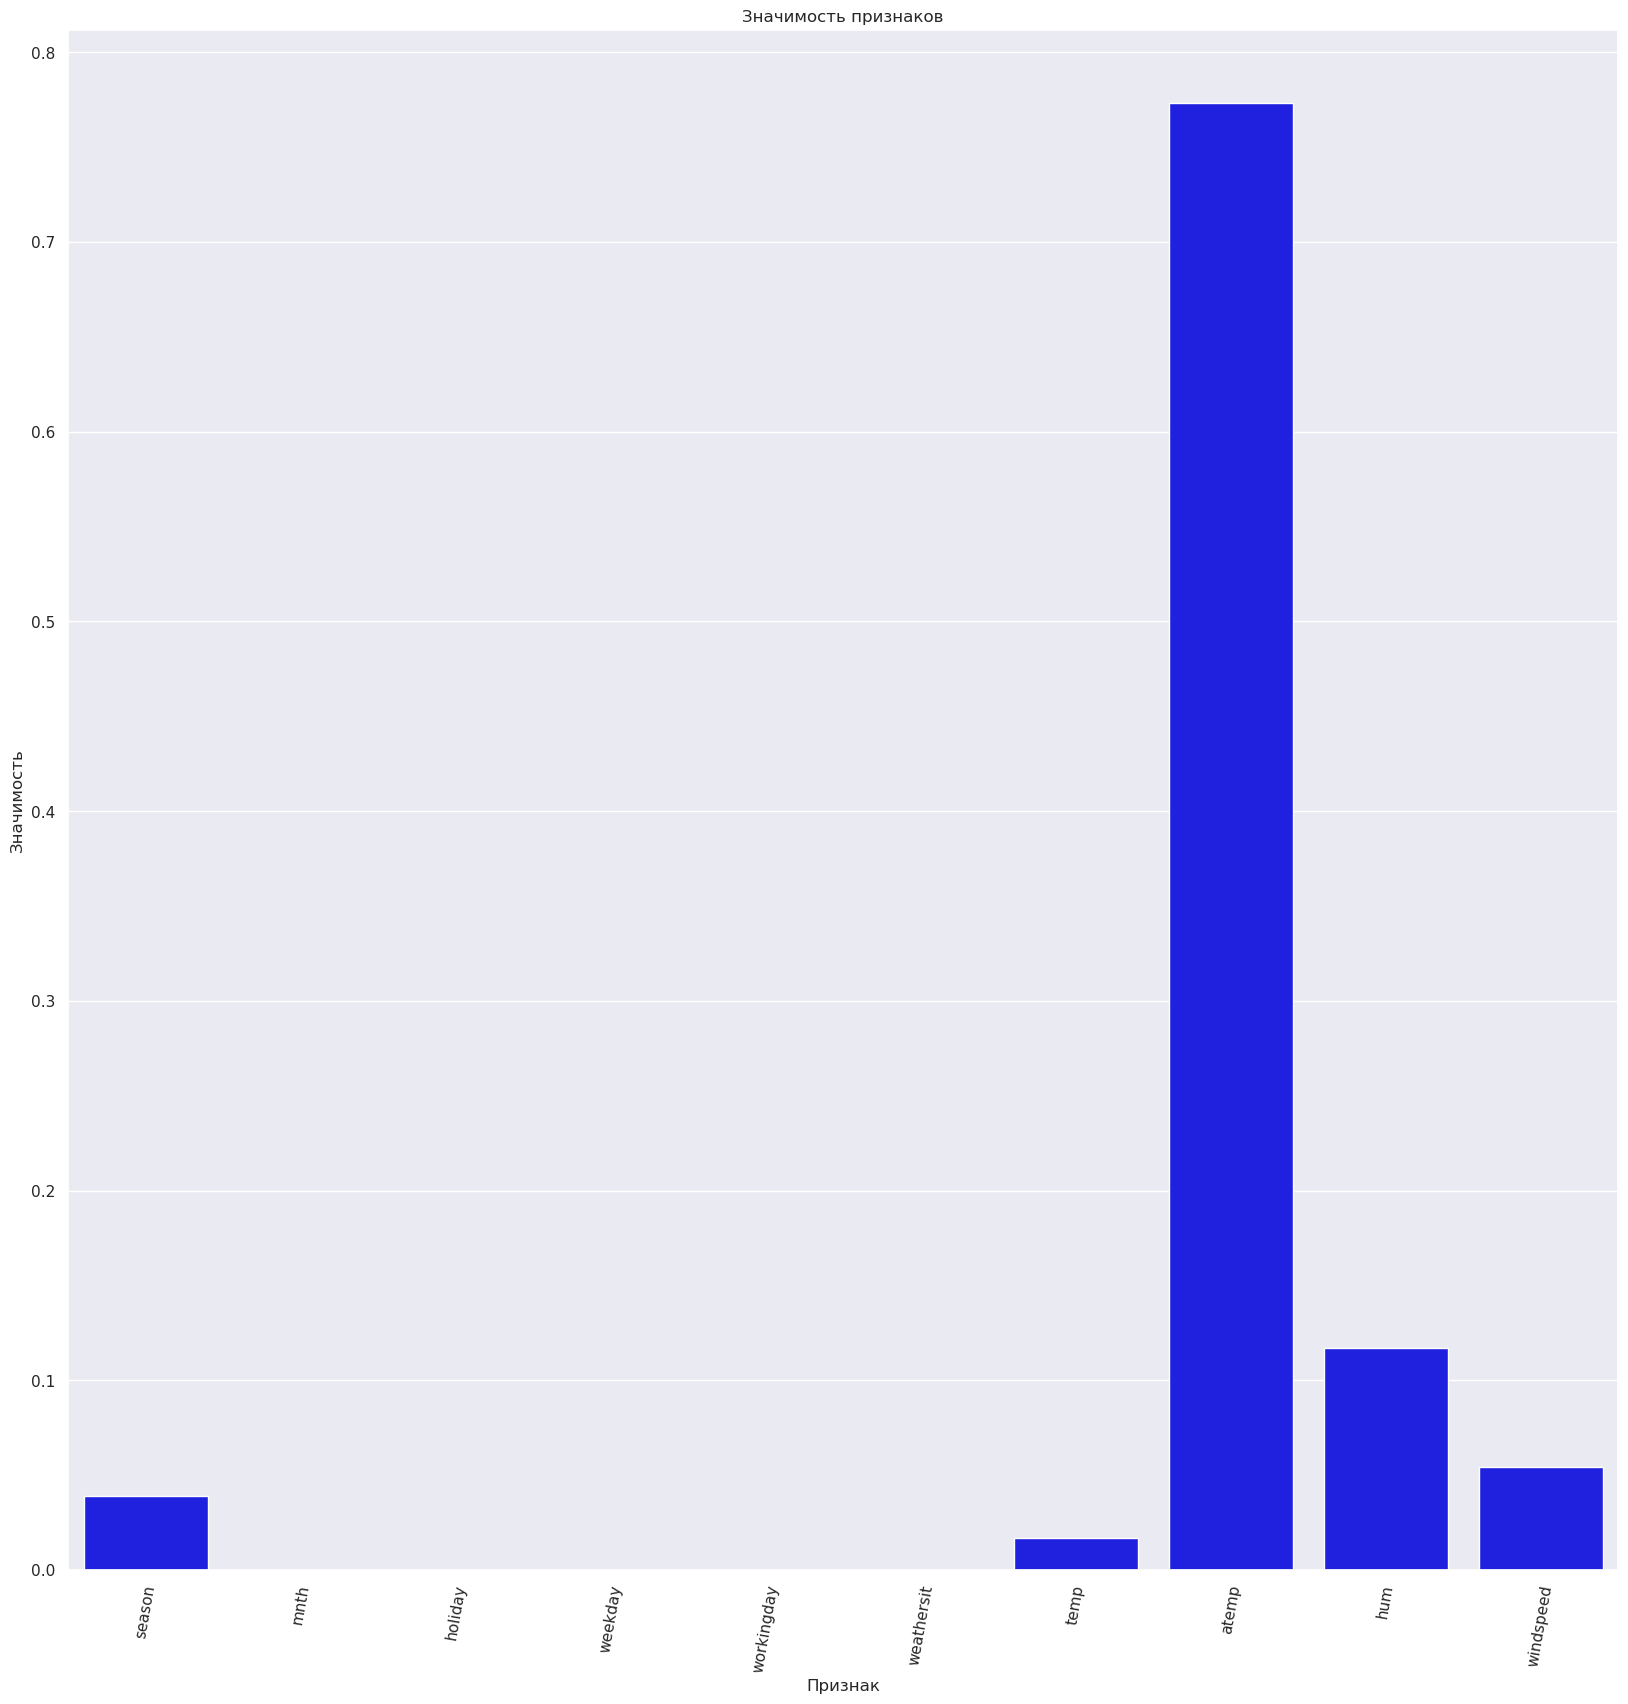

In [90]:
sns.set(style="darkgrid")
fig = plt.figure(figsize=(20, 20))
ax = sns.barplot(
    x=list(feature_importance.index),
    y=feature_importance['Values'],
    color='blue',
)
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
plt.xlabel('Признак')
plt.ylabel('Значимость')
plt.title('Значимость признаков')
plt.show()

Сделайте выводы.

**Вывод:** atemp является монотонной функцией от temp, поэтому из графика можно заметить что важность atemp большая, в то время как важность temp маленькая. Дерево по сравнению с линейной регрессией на одинаковых данных отработало немного лучше.

---
### Задача 3.

Для данных из предыдущей части обучите случайный лес на 500 деревьев.

In [92]:
estimator = RandomForestRegressor(n_estimators=500)
estimator.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [94]:
val_preds = []
train_preds = []

for i in estimator.estimators_:
    val_preds.append(i.predict(X_val))
    train_preds.append(i.predict(X_train))

/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWa

/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWa

/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWa

/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWa

/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/yaroslav/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWa

Постройте график зависимости ошибки модели в зависимости от количества деревьев для обучающей и валидационной выборок.

*Замечание.* Не нужно заново обучать лес каждый раз. Используйте у *обученной* модели поле `estimators_`, это список из объектов класса `DecisionTreeRegressor`. Обратите внимание, что это приватное поле объекта, и менять его очень плохо, за такое баллы будут снижаться.

In [95]:
val_estim = [sum(val_preds[:i])/len(val_preds[:i]) for i in range(1, 500)]
train_estim = [sum(train_preds[:i])/len(train_preds[:i]) for i in range(1, 500)]

In [96]:
val_estim = list(enumerate([1] + val_estim))[1:]
train_estim = list(enumerate([1] + train_estim))[1:]

In [97]:
rmse_val = []
mape_val = []

rmse_train = []
mape_train = []


for i in val_estim:
    rmse_val.append((i[0], mean_squared_error(y_val, i[1])))
    mape_val.append((i[0], mean_absolute_percentage_error(y_val, i[1])))

for i in train_estim:
    rmse_train.append((i[0], mean_squared_error(y_train, i[1])))
    mape_train.append((i[0], mean_absolute_percentage_error(y_train, i[1])))

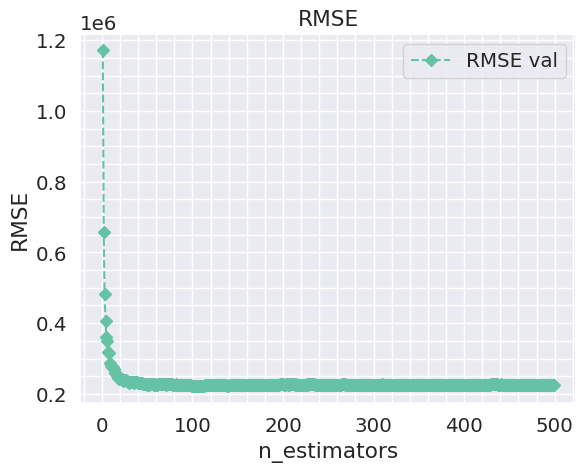

In [98]:
plot_rmse(rmse_train, xlabel='n_estimators')

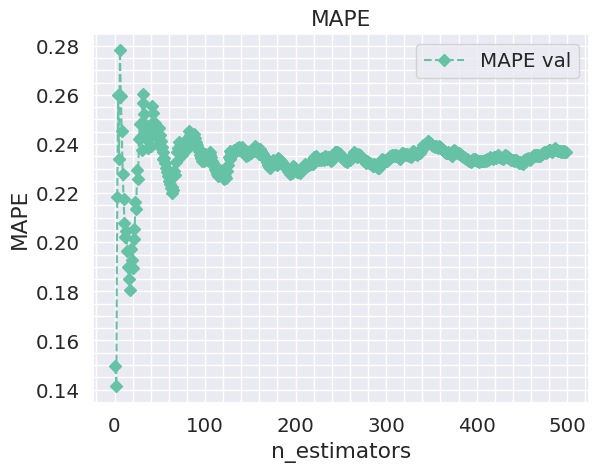

In [99]:
plot_mape(mape_train, xlabel='n_estimators')

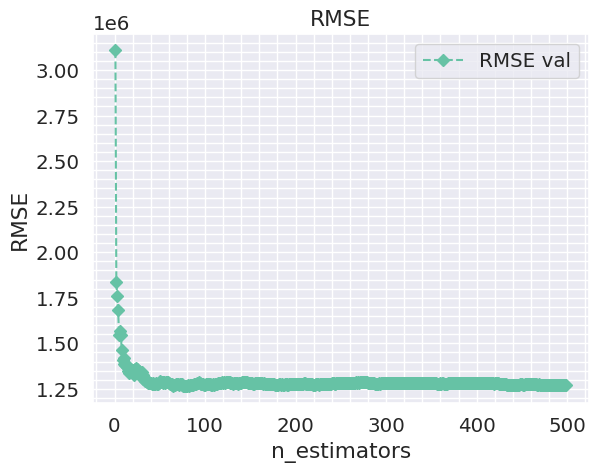

In [100]:
plot_rmse(rmse_val, xlabel='n_estimators')

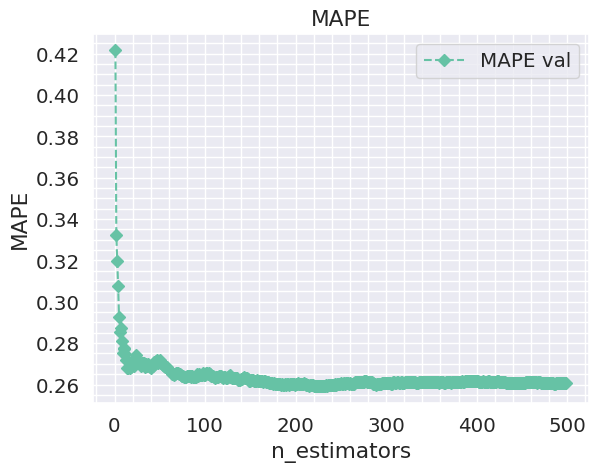

In [101]:
plot_mape(mape_val, xlabel='n_estimators')

In [104]:
print("MAPE:",round(mean_absolute_percentage_error(y_val, estimator.predict(X_val))*100, 2), "%\nRMSE:",
mean_squared_error(y_val, estimator.predict(X_val)))

MAPE: 26.05 %
RMSE: 1270193.7271594368


In [105]:
print("MAPE:",round(mean_absolute_percentage_error(y_test, estimator.predict(X_test))*100, 2), "%\nRMSE:",
mean_squared_error(y_test, estimator.predict(X_test)))

MAPE: 26.33 %
RMSE: 1356838.2881335213


Для леса с максимальным количеством деревьев визуализируйте
важность признаков, используя поле `feature_importances_`. 

In [102]:
feature_importance = pd.DataFrame(np.array(list(zip(X_train.columns, estimator.feature_importances_)))\
                                  .reshape(-1, 2))
feature_importance = feature_importance.set_index(0)
feature_importance.columns = ['Values']
feature_importance = feature_importance.explode('Values')
feature_importance['Values'] = feature_importance['Values'].astype('float')
feature_importance

,Values
0,
season,0.043855
mnth,0.041274
holiday,0.000000
weekday,0.032379
workingday,0.008838
weathersit,0.022446
temp,0.229269
atemp,0.362499
hum,0.161322


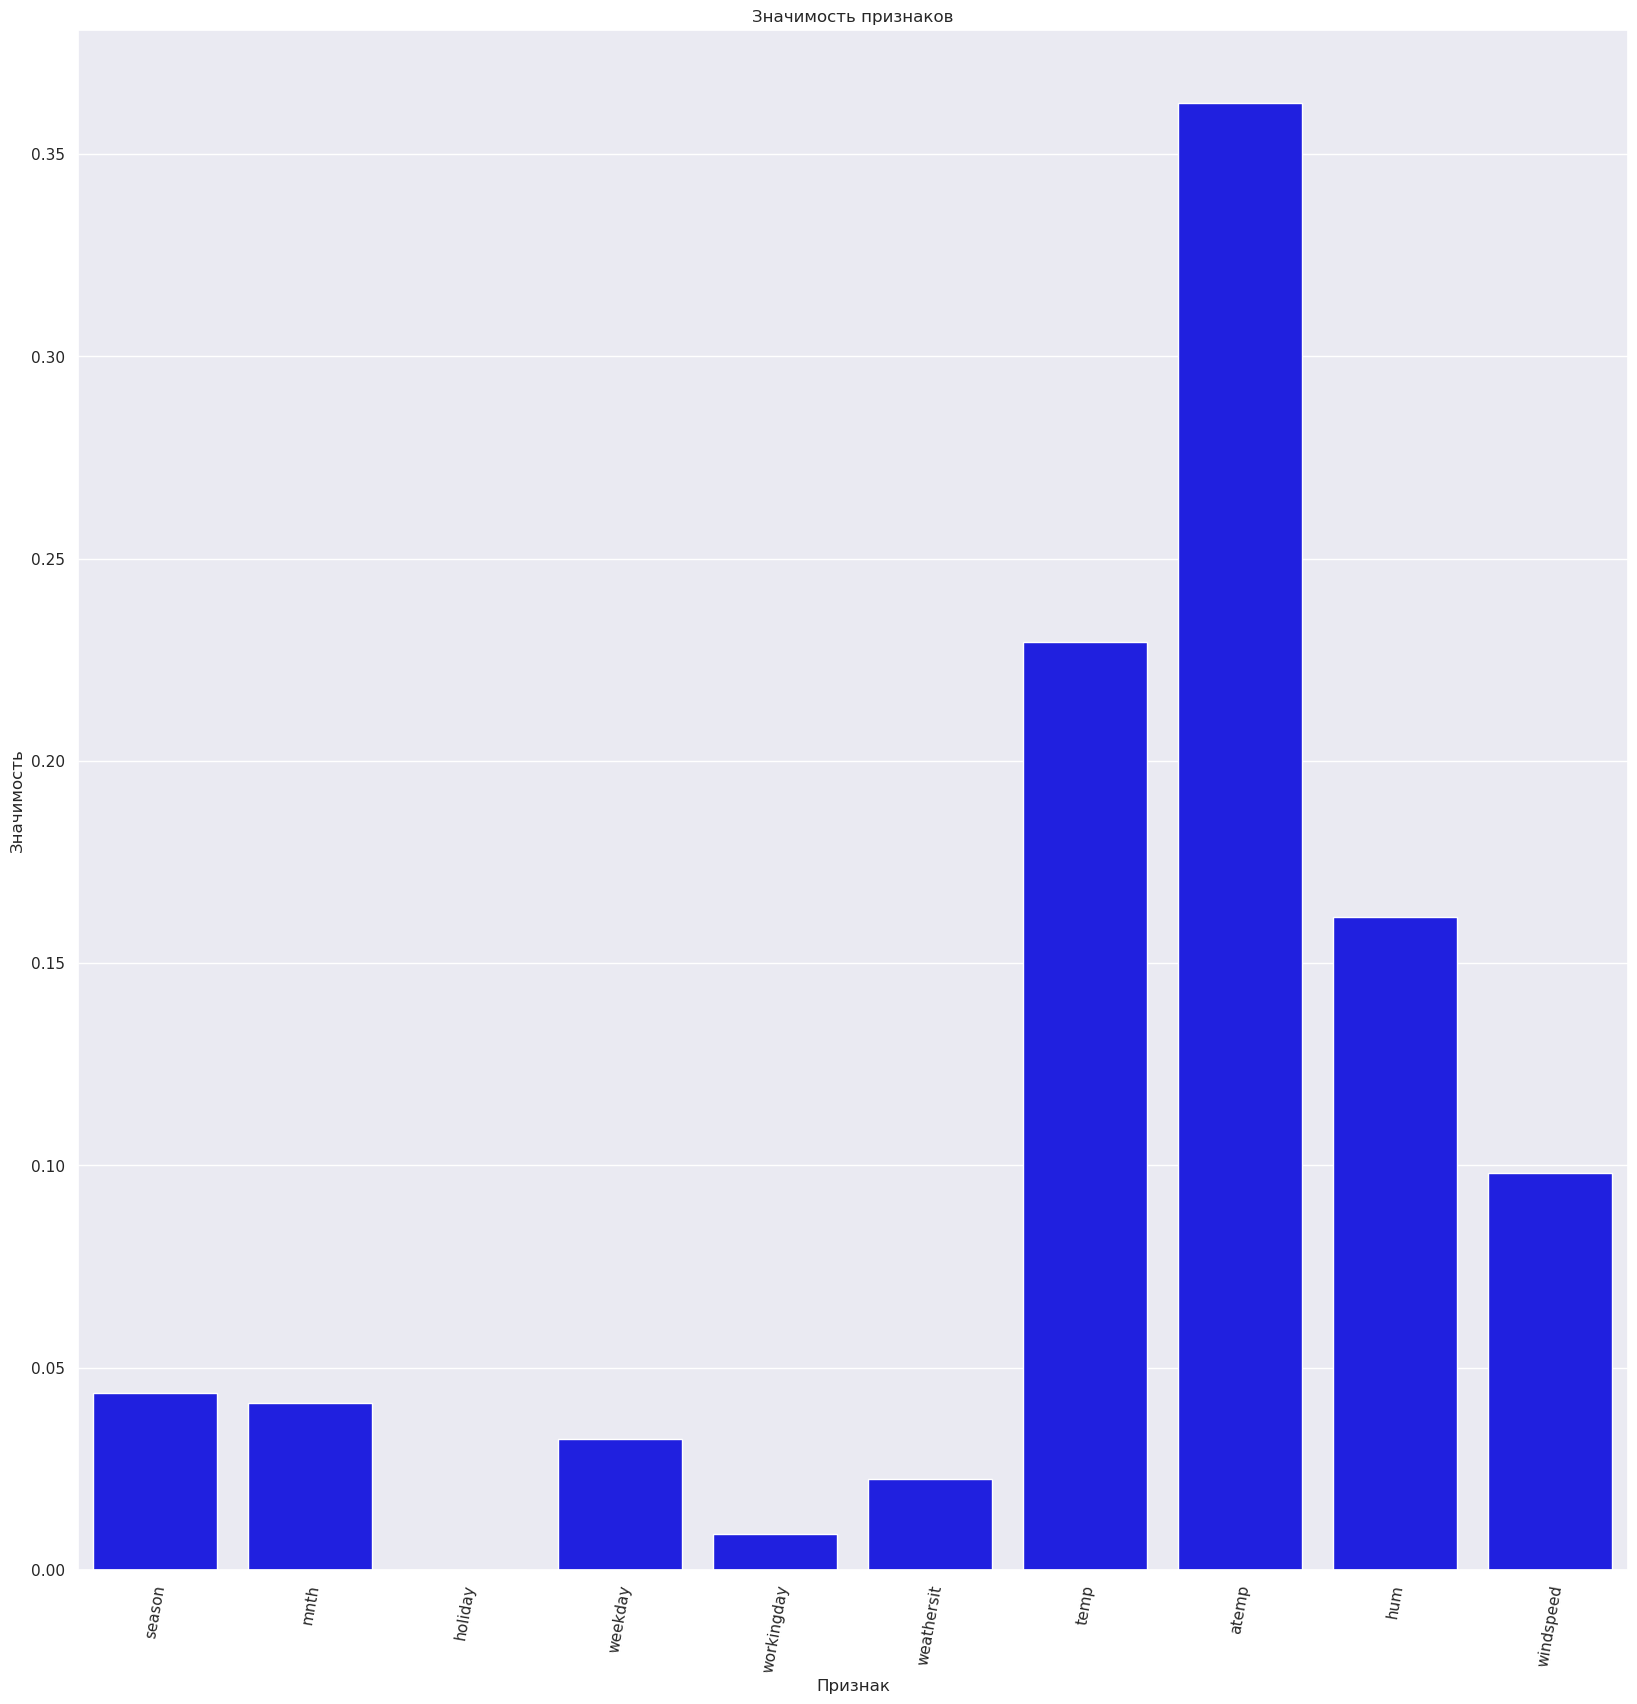

In [103]:
sns.set(style="darkgrid")
fig = plt.figure(figsize=(20, 20))
ax = sns.barplot(
    x=list(feature_importance.index),
    y=feature_importance['Values'],
    color='blue',
)
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
plt.xlabel('Признак')
plt.ylabel('Значимость')
plt.title('Значимость признаков')
plt.show()

Сделайте выводы.

**Вывод:** видим, случайный лес отработал лучше, чем одно дерево. Лес прочувствовал закономерности из большего количества признаков, чем одно дерево.